## The Data Story inside Steinbeck's Cannery Row

A *My Data Story* learning experience showing the sardine collapse in Monterrey California in the 20th Century through the novel Cannery Row by John Steinbeck.

#### Prep Code

In [45]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

os.chdir("C:/Users/drewc/Documents/GitHub/stories")

temp = pd.read_csv("data/scripps_temps_stage.csv")
temp.info()

ueber = pd.read_csv("data/ueber_landings_stage.csv")
ueber.info()

noaa = pd.read_csv("data/noaa_master_stage.csv")
noaa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37356 entries, 0 to 37355
Data columns (total 5 columns):
Year      37356 non-null int64
Month     37356 non-null int64
Day       37356 non-null int64
Surf      36151 non-null float64
Bottom    31775 non-null float64
dtypes: float64(2), int64(3)
memory usage: 1.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
Year    51 non-null int64
Tons    51 non-null int64
dtypes: int64(2)
memory usage: 896.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
Year       109915 non-null float64
State      109915 non-null object
Species    109915 non-null object
Pounds     109908 non-null float64
Tons       1048575 non-null float64
Dollars    109894 non-null float64
dtypes: float64(4), object(2)
memory usage: 48.0+ MB


### Monterrey Finshing Data Before 1970

#### Plot Monterrey Data

Text(0.5, 1.0, 'Sardines Harvested in Monterrey')

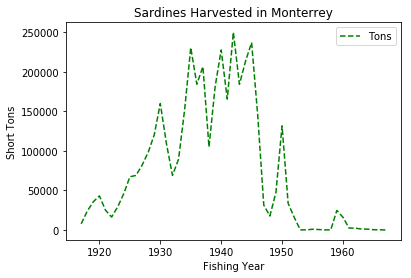

In [71]:
xu = ueber["Year"]
yu = ueber["Tons"]
plt.plot(xu, yu, 'g--')
plt.ylabel("Short Tons")
plt.xlabel("Fishing Year")
plt.legend()
plt.title("Sardines Harvested in Monterrey")

### Water Temperature Data from La Jolla Pier

Before and after the the collapse, thes sardine fishery fluctuated by year. Compare the water temperature dataset to assess any relationship. 

#### Group Temperature Data by Day, Month, and Year average

In [36]:
gtemp = temp.groupby(["Year", "Month", "Day"]).mean()
gsurf = gtemp.groupby("Year")["Surf"].mean() 
gbott = gtemp.groupby("Year")["Bottom"].mean() 

#### Convert Series to Frame, Reset Index, and Combine back together

In [29]:
dsurf = gsurf.to_frame()
dbott = gbott.to_frame()

isurf = dsurf.reset_index(level=["Year"])
ibott = dbott.reset_index(level=["Year"])

ibott["Surf"] = isurf["Surf"]
tm = ibott

#### Create Plot with Labels, Title and Legend

Text(0.5, 1.0, 'Bottom Temperature at La Jolla Pier')

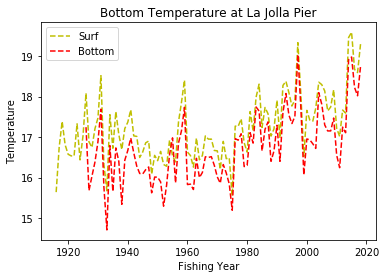

In [30]:
xtm = tm["Year"]
ytms = tm["Surf"]
plt.plot(xtm, ytms, 'y--')
plt.ylabel("Temperature")
plt.xlabel("Fishing Year")
plt.legend()
plt.title("Surf Temperature at La Jolla Pier")

ytmb = tm["Bottom"]
plt.plot(xtm, ytmb, 'r--')
plt.ylabel("Temperature")
plt.xlabel("Fishing Year")
plt.legend()
plt.title("Bottom Temperature at La Jolla Pier")

#### Plot All Data Together before 1963

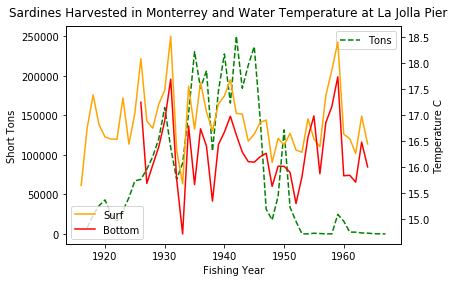

In [37]:
fig, ax1 = plt.subplots()

xu = ueber["Year"]
yu = ueber["Tons"]
plt.plot(xu, yu, 'g--')
plt.ylabel("Short Tons")
plt.xlabel("Fishing Year")
plt.legend()

ax2 = ax1.twinx()

tm65 = tm[tm.Year < 1965]
xta = tm65["Year"]
ysa = tm65["Surf"]
ax2.plot(xta, ysa, "orange")
ax2.set_ylabel("Temperature C")

yba = tm65["Bottom"]
ax2.plot(xta, yba, "red")
ax2.legend()

fig.suptitle("Sardines Harvested in Monterrey and Water Temperature at La Jolla Pier", y = 0.95, fontsize = 12)
fig.savefig("fig/fish_plot_uebertemp.jpeg")

### California Fishing Data from NOAA after 1950

Starting in the 1940s, the Sardine fishery in the southern pacific went through a dramatic transformation  Use the dataset from the NOAA website to learn what happened. Record your process below.

#### Group NOAA data By Year, State, and Species. Drop Columns.

In [22]:
gnoaa = noaa.groupby(["Year", "State", "Species"], as_index = False).sum()
dnoaa = gnoaa.drop(["Dollars", "Pounds"], axis=1)

#### Filter Dataset for Sardines in California

In [23]:
snoaa = dnoaa[dnoaa.Species == "SARDINE, PACIFIC"]
ca = snoaa[snoaa.State == "California"]

#### Create Plot with Labels, Title and Legend

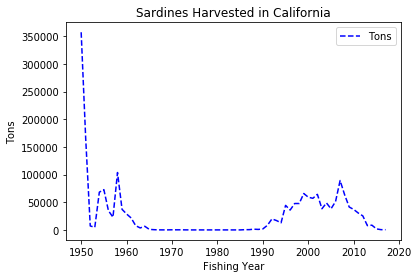

In [24]:
xca = ca["Year"]
yca = ca["Tons"]
plt.plot(xca, yca, 'b--')
plt.ylabel("Tons")
plt.xlabel("Fishing Year")
plt.legend()
plt.title("Sardines Harvested in California")
plt.show()

#### Drop year 1951 as Outlier and Replot

In [40]:
ca = ca[ca.Year > 1951] 

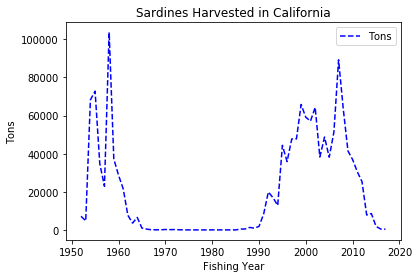

In [26]:
xca = ca["Year"]
yca = ca["Tons"]
plt.plot(xca, yca, 'b--')
plt.ylabel("Tons")
plt.xlabel("Fishing Year")
plt.legend()
plt.title("Sardines Harvested in California")
plt.show()

#### Plot with Temperature Data after 1951

Text(0.5, 0.95, 'Sardines Harvested and Water Temperature in California')

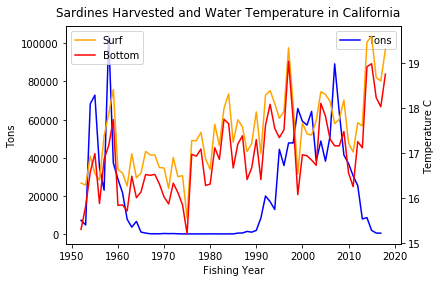

In [33]:
fig, ax1 = plt.subplots()

xca = ca["Year"]
yca = ca["Tons"]
ax1.plot(xca, yca, color = "blue")
ax1.set_ylabel("Tons")
ax1.set_xlabel("Fishing Year")
plt.legend()

ax2 = ax1.twinx()

tm51 = tm[tm.Year > 1951] 
xtm51 = tm51["Year"]
ytms51 = tm51["Surf"]
ax2.plot(xtm51, ytms51, "orange")
ax2.set_ylabel("Temperature C")

ytmb51 = tm51["Bottom"]
plt.plot(xtm51, ytmb51, "red")

plt.legend()
fig.suptitle("Sardines Harvested and Water Temperature in California", y = 0.95, fontsize = 12)

### Post Collapse in California

#### Plot Bottom Temp and State Data Together between 1952 and 1958

Text(0.5, 0.95, 'Sardines Harvested and Water Temperature in California')

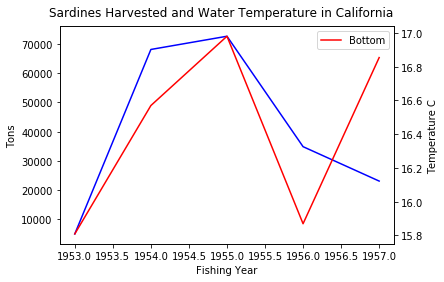

In [52]:
fig, ax1 = plt.subplots()

ca52 = ca[ca.Year > 1952]
ca5258 = ca52[ca52.Year < 1958]

tm52 = tm[tm.Year > 1952]
tm5258 = tm52[tm52.Year < 1958]

xca5258 = ca5258["Year"]
yca5258 = ca5258["Tons"]
ax1.plot(xca5258, yca5258, color = "blue")
ax1.set_ylabel("Tons")
ax1.set_xlabel("Fishing Year")

ax2 = ax1.twinx()

xtm5258 = tm5258["Year"]
ytm5258 = tm5258["Bottom"]
ax2.plot(xtm5258, ytm5258, "red")
ax2.set_ylabel("Temperature C")

plt.legend()
fig.suptitle("Sardines Harvested and Water Temperature in California", y = 0.95, fontsize = 12)

#### Perform Linear Regression on 1952 to 1958 data

In [49]:
model = LinearRegression()

x5258 = np.array(tm5258["Bottom"]).reshape((-1, 1))
y5258 = np.array(ca5258["Tons"]).reshape((-1, 1))

model.fit(x5258, y5258)
r5258 = model.score(x5258, y5258)
print("Rsq of Post Collapse Data = ", r5258)

Rsq of Post Collapse Data =  0.38098214873482616


### Post Recovery Data Analysis In California

#### Plot All Data Together after 1985

Text(0.5, 0.95, 'Sardines Harvested and Water Temperature in California')

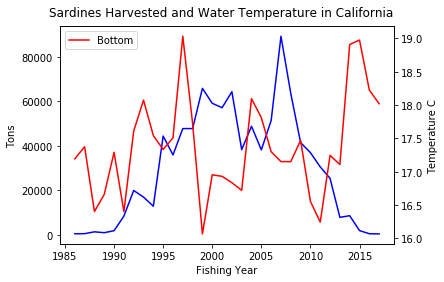

In [57]:
fig, ax1 = plt.subplots()

ca85 = ca[ca.Year > 1985]
xca85 = ca85["Year"]
yca85 = ca85["Tons"]
ax1.plot(xca85, yca85, color = "blue")
ax1.set_ylabel("Tons")
ax1.set_xlabel("Fishing Year")

ax2 = ax1.twinx()

tm85 = tm[tm.Year > 1985]
tm85 = tm85[tm85.Year < 2018]
xtm85 = tm85["Year"]
ytm85 = tm85["Bottom"]
ax2.plot(xtm85, ytm85, "red")
ax2.set_ylabel("Temperature C")

plt.legend()
fig.suptitle("Sardines Harvested and Water Temperature in California", y = 0.95, fontsize = 12)

#### Perform Linear Regression on Post-Recovery Data

In [58]:
model = LinearRegression()

x85 = np.array(tm85["Bottom"]).reshape((-1, 1))
y85 = np.array(ca85["Tons"]).reshape((-1, 1))

model.fit(x85, y85)
r85 = model.score(x85, y85)
print("Rsq of Post Recovery State Data = ", r85)

Rsq of Post Collapse State Data =  0.04356038294606568


#### Phase Post-Recovery Data by 10 Years and Check Fit

In [72]:
phs10 = tm["Year"] + 10

tm["Phase10"] = phs10

tm10 = tm[tm.Phase10 < 2010]
tm8510 = tm10[tm10.Phase10 > 1985]

ca10 = ca85[ca85.Year < 2010]
ca8510 = ca10[ca10.Year > 1985]

x8510 = np.array(tm8510["Phase"]).reshape((-1, 1))
y8510 = np.array(ca8510["Tons"]).reshape((-1, 1))

model.fit(x8510, y8510)
r8510 = model.score(x8510, y8510)
print("Rsq 1985 to 2010 with 10 year lag = ", r8510)

Rsq 1985 to 2010 with 10 year lag =  0.6989541586588516


#### Phase Pre-Collapse Data by 1 Year and Recheck Fit

In [74]:
phs1 = tm["Year"] + 1
tm["Phase1"] = phs1

tm45 = tm[tm.Phase1 < 1945]
tm2745 = tm45[tm45.Phase1 > 1927]

ueber45 = ueber[ueber.Year < 1945]
ueber2745 = ueber45[ueber45.Year > 1927]

x2745 = np.array(tm2745["Phase1"]).reshape((-1, 1))
y2745 = np.array(ueber2745["Tons"]).reshape((-1, 1))


model.fit(x2745, y2745)
r2745 = model.score(x2745, y2745)
print("Rsq Pre Collapse Data with 1 year lag = ", r2745)

Rsq Pre Collapse Data with 1 year lag =  0.448382612149383


#### Perform Linear Regression on Phase Data

In [65]:
xp75 = np.array(ol75["Phase"]).reshape((-1, 1))

model.fit(xp75, y75)
r75 = model.score(xp75, y75)
print("Rsq 1927 to 1945 with 1 year lag = ", r75)

NameError: name 'ol75' is not defined

## Conclusions

#### NOAA Data

Sardines experienced a significant drop before 1950 and was unfished for decades. In the mid 1980s, the fishery was recovered enough but was not as plentiful as before.

#### Temperature Data

When the fishery has been fished, there is a relationship between temperature and harvest. While the entire dataset shows no relationship, the filtered data during the mid 1950s showed a significant positive association between bottom temperature and sardines fished. 

#### Monterrey Historical Data

When the older data is assessed, agressive fishing began in 1926 and ended in 1945. When the temperatures are evaluated, there appears to be some assoication but it is not as strong as the other data subset from the 1950s. 

#### Phased Years

A 1 year delay is strongest in pre collapse data (1927-1945); no delay is strongest in the post collapse data (1952-58); but a 10 year dealy is strongest in contemporary data (1995-2010). It is possible that best practices would include some element of restricted dealy in how much harvest is allowed per year. 

> “Doc would listen to any kind of nonsense and change it for you to a kind of wisdom.”
>
> ― Cannery Row